In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster
import warnings
warnings.filterwarnings("ignore")

##Importing the data Importing the data

In [2]:
df= pd.read_excel('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Capstone _PGP DSBA/Capstone_Project Note -1/Capstone _Py /Social Media Data for DSBA.xlsx')

##View Top 5 Records of Dataset

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


##Checking For Duplicates Values in data 

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(11760, 17)

##View bottom 5 Records of Dataset

In [6]:
df.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0,14


## Removal of Unwanted Column "UserUID" from data 

In [7]:
df.drop(['UserID'],axis=1,inplace=True)

##Shape of data

In [8]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  11760 
no. of columns:  16


##Data Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [10]:
# Making different list for categorical columns and numerical columns
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Taken_product', 'preferred_device', 'yearly_avg_Outstation_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag']
['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page']


## Summary statistics of Dataset

In [11]:
# Describe for numerical and categorical columns¶
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11179.0,280.830844,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,28170.481765,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,74.790029,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6531.699065,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,28.661565,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,0.793878,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.817432,9.070657,0.0,8.00,12.0,18.00,270.0


In [12]:
df[cat].describe().T

,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11707,10,Tab,4172
yearly_avg_Outstation_checkins,11685,30,1,4543
member_in_family,11760,7,3,4561
preferred_location_type,11729,15,Beach,2424
following_company_page,11657,4,No,8355
working_flag,11760,2,No,9952


## Proportion of Target variable in data 

In [13]:
df.Taken_product.value_counts()

No     9864
Yes    1896
Name: Taken_product, dtype: int64

##Data type of data 

In [14]:
df.dtypes

Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                   object
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                        int64
Daily_Avg_mins_spend_on_traveling_page            int64
dtype: object

In [15]:
df.dtypes.value_counts()

object     7
int64      6
float64    3
dtype: int64

##Checking for Missing Values in data 

In [16]:
df.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [17]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

Yearly_avg_view_on_travel_page             581
preferred_device                            53
total_likes_on_outstation_checkin_given    381
yearly_avg_Outstation_checkins              75
preferred_location_type                     31
Yearly_avg_comment_on_travel_page          206
following_company_page                     103
dtype: int64

In [18]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

Yearly_avg_view_on_travel_page             float64
preferred_device                            object
total_likes_on_outstation_checkin_given    float64
yearly_avg_Outstation_checkins              object
preferred_location_type                     object
Yearly_avg_comment_on_travel_page          float64
following_company_page                      object
dtype: object

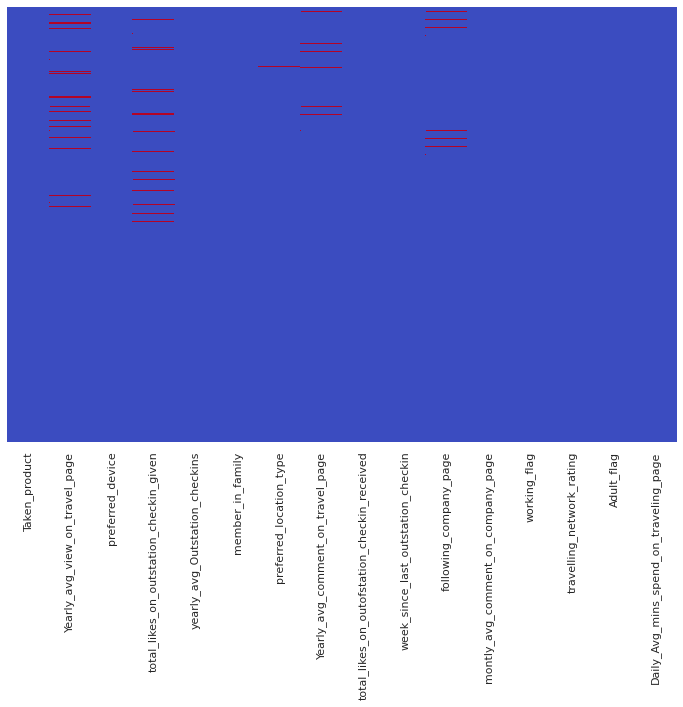

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

##Null Values Imputation

In [20]:
df.columns

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [21]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Taken_product', 'preferred_device', 'yearly_avg_Outstation_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag']
['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page']


##Impute the Non-Object values using Median

In [22]:
median1=df["Yearly_avg_view_on_travel_page"].median()
median2=df["total_likes_on_outstation_checkin_given"].median()
median3=df["Yearly_avg_comment_on_travel_page"].median()



df["Yearly_avg_view_on_travel_page"].replace(np.nan,median1,inplace=True)
df["total_likes_on_outstation_checkin_given"].replace(np.nan,median2,inplace=True)
df["Yearly_avg_comment_on_travel_page"].replace(np.nan,median3,inplace=True)


##Impute the Object values using Mode

In [23]:
mode1=df["preferred_device"].mode().values[0]
mode2=df["yearly_avg_Outstation_checkins"].mode().values[0]
mode3=df["preferred_location_type"].mode().values[0]
mode4=df["following_company_page"].mode().values[0]


df["preferred_device"]=df["preferred_device"].replace(np.nan,mode1)
df["yearly_avg_Outstation_checkins"]= df["yearly_avg_Outstation_checkins"].replace(np.nan,mode2)
df["preferred_location_type"]=df["preferred_location_type"].replace(np.nan,mode3)
df["following_company_page"]=df["following_company_page"].replace(np.nan,mode4)

## Confirmation that there is No null values in data after Imputation

In [24]:
df.isnull().sum()


Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

Data -Preprocessing / Treat the Bad Data

##Uniques values in variables and correction of data

In [25]:
df.member_in_family.unique()

array([2, 1, 4, 'Three', 3, 5, 10], dtype=object)

In [26]:
df['member_in_family'].value_counts()

3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

In [27]:
df['member_in_family'].replace(to_replace='Three',value=np.NAN,inplace =True)

In [28]:
df['member_in_family'].value_counts()

3.0     4561
4.0     3184
2.0     2256
1.0     1349
5.0      384
10.0      11
Name: member_in_family, dtype: int64

In [29]:
df['member_in_family'].isnull().sum()

15

In [30]:
df['member_in_family'].mode().values[0]

3.0

In [31]:
df['member_in_family'].fillna(df['member_in_family'].mode().values[0],inplace=True)

In [32]:
df['member_in_family'].value_counts()

3.0     4576
4.0     3184
2.0     2256
1.0     1349
5.0      384
10.0      11
Name: member_in_family, dtype: int64

##BAD Data Treatment'*'

In [33]:
df.yearly_avg_Outstation_checkins .unique()

array([1, 24, 23, 27, 16, 15, 26, 19, 21, 11, 10, 25, 12, 18, 29, 22, 14,
       20, 28, 17, 13, '*', 5, 8, 2, 3, 9, 7, 6, 4], dtype=object)

In [34]:
df.replace('*',1,inplace=True)

In [35]:
df.yearly_avg_Outstation_checkins .unique()

array([ 1, 24, 23, 27, 16, 15, 26, 19, 21, 11, 10, 25, 12, 18, 29, 22, 14,
       20, 28, 17, 13,  5,  8,  2,  3,  9,  7,  6,  4])

In [36]:
df[df['yearly_avg_Outstation_checkins']=='*']['yearly_avg_Outstation_checkins'].nunique()

0

In [37]:
df['yearly_avg_Outstation_checkins']=df['yearly_avg_Outstation_checkins'].astype('float64')

In [38]:
df.dtypes

Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                  float64
member_in_family                                float64
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                        int64
Daily_Avg_mins_spend_on_traveling_page            int64
dtype: object

## Separate the Preferred Device Into mobiles and Laptops

In [39]:
df.preferred_device.unique()

array(['iOS and Android', 'iOS', 'ANDROID', 'Tab', 'Android',
       'Android OS', 'Other', 'Others', 'Laptop', 'Mobile'], dtype=object)

In [40]:
df['preferred_device'] = np.where(df['preferred_device'] == 'Laptop','Laptop','Mobile')

In [41]:
df['preferred_device']=np.where(df['preferred_device'] =='Mobile','1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='Laptop','0', df['preferred_device'])

In [42]:
df['preferred_device']=df['preferred_device'].astype('float64')

In [43]:
df['preferred_device'].value_counts(normalize=True)

1.0    0.905782
0.0    0.094218
Name: preferred_device, dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  float64
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  float64
 6   preferred_location_type                       11760 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

## Clubbing all levels into Yes and No category 

In [45]:
df['following_company_page'].value_counts()

No     8458
Yes    3285
1        12
0         5
Name: following_company_page, dtype: int64

In [46]:
df['following_company_page'].replace(to_replace=[1,0],value=np.NAN,inplace =True)

In [47]:
df['following_company_page'].value_counts()

No     8458
Yes    3285
Name: following_company_page, dtype: int64

In [48]:
df['following_company_page'].isnull().sum()

17

In [49]:
df['following_company_page'].mode().values[0]

'No'

In [50]:
df['following_company_page'].fillna(df['following_company_page'].mode().values[0],inplace=True)

In [51]:
df['following_company_page'].value_counts()

No     8475
Yes    3285
Name: following_company_page, dtype: int64

## Coverted 2,3 as nan and then replaced by median 

In [52]:
df['Adult_flag'].value_counts()

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

In [53]:
df['Adult_flag'].replace(to_replace=[2,3],value=np.NAN,inplace =True)

In [54]:
df['Adult_flag'].value_counts()

0.0    5048
1.0    4768
Name: Adult_flag, dtype: int64

In [55]:
df['Adult_flag'].isnull().sum()

1944

In [56]:
df['Adult_flag'].median()

0.0

In [57]:
df['Adult_flag'].median()

0.0

In [58]:
# df['Adult_flag'].fillna(df[df['Adult_flag']].median(),inplace=True)
df['Adult_flag'].fillna(df['Adult_flag'].median(),inplace=True)

In [59]:
df['Adult_flag'].value_counts()

0.0    6992
1.0    4768
Name: Adult_flag, dtype: int64

## Unique values for categorical variables

In [60]:
for column in df.columns:
    if df[column].dtype =='object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TAKEN_PRODUCT :  2
Yes    1896
No     9864
Name: Taken_product, dtype: int64


PREFERRED_LOCATION_TYPE :  15
Movie                 5
OTT                   7
Game                 12
Tour and Travel      47
Tour  Travel         60
Hill Stations       108
Entertainment       516
Trekking            528
Social media        633
Big Cities          636
Other               643
Medical            1845
Historical site    1856
Financial          2409
Beach              2455
Name: preferred_location_type, dtype: int64


FOLLOWING_COMPANY_PAGE :  2
Yes    3285
No     8475
Name: following_company_page, dtype: int64


WORKING_FLAG :  2
Yes    1808
No     9952
Name: working_flag, dtype: int64




In [61]:
df.preferred_location_type.value_counts()

Beach              2455
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [62]:
df.preferred_location_type.unique()

array(['Financial', 'Other', 'Medical', 'Beach', 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations'],
      dtype=object)

##Corrections In Tour and Travel 

In [63]:

df['preferred_location_type'] = df['preferred_location_type'].str.replace('Tour and Travel','TourTravel')

In [64]:

df['preferred_location_type'] = df['preferred_location_type'].str.replace('Tour  Travel','TourTravel')

In [65]:
df.preferred_location_type.value_counts()

Beach              2455
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
TourTravel          107
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [66]:
df.preferred_device.unique()

array([1., 0.])

In [67]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Taken_product
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: preferred_location_type
['Financial', 'Other', 'Medical', 'Beach', 'Game', ..., 'OTT', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 14
Categories (14, object): ['Beach', 'Big Cities', 'Entertainment', 'Financial', ..., 'Other',
                          'Social media', 'TourTravel', 'Trekking']
[ 3 10  7  0  4 11  2 12  8  9  6  1 13  5]


feature: following_company_page
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: working_flag
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [68]:
# unique values for categorical variables
for column in df.columns:
    if df[column].dtype =='object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

No bad data observed in below variables

In [69]:
df.yearly_avg_Outstation_checkins.unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,  9.,
        7.,  6.,  4.])

In [70]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [71]:
# df1 = df.dropna()

In [72]:
df.Yearly_avg_view_on_travel_page.unique()

array([307., 367., 277., 247., 202., 240., 271., 225., 285., 270., 262.,
       217., 232., 255., 210., 165., 397., 180., 157., 330., 345., 292.,
       322., 375., 195., 360., 412., 382., 300., 405., 435., 150., 187.,
        42., 427., 352.,  35., 450., 135., 308., 368., 249., 205., 445.,
       226., 287., 263., 219., 234., 256., 212., 241., 399., 286., 182.,
       159., 316., 332., 347., 248., 331., 294., 323., 376., 265., 204.,
       309., 257., 346., 264., 361., 196., 278., 444., 272., 414., 339.,
       443., 233., 280., 422., 174., 384., 302., 242., 181., 211., 436.,
       279., 151., 377., 188., 189., 166., 406., 324., 197., 143., 167.,
       383., 227., 144., 301., 429., 203., 250., 413., 338., 310., 392.,
       317., 354., 400., 369., 137., 136., 295., 391., 353., 218., 362.,
       428., 451., 430., 173., 190., 398., 355., 437., 407., 152., 421.,
       158., 293., 235., 220., 340., 385., 370., 325., 415., 452., 315.,
       379., 290., 231., 281., 269., 222., 244., 22

In [73]:
df.total_likes_on_outstation_checkin_given.unique()

array([38570.,  9765., 48055., ...,  5478., 35851., 22025.])

In [74]:
df.Yearly_avg_comment_on_travel_page.unique()

array([ 94.,  61.,  92.,  56.,  40.,  79.,  81.,  67.,  44.,  84.,  49.,
        31.,  93.,  50.,  51.,  80.,  96.,  78.,  45.,  82.,  53.,  83.,
        58.,  72.,  48.,  42.,  41.,  86.,  97.,  75.,  33.,  37.,  73.,
        98.,  47.,  71.,   3.,  43.,  99.,  59.,  95.,  57.,  76.,  87.,
        66.,  55.,  32.,  52.,  70.,  62.,  64.,  63.,  60., 100.,  46.,
        39.,  77.,  91.,  54.,  34.,  90.,  65.,  36.,  88.,  35.,  89.,
        68.,  85.,  69.,  74.,  38., 106., 105., 103., 108., 111., 104.,
       102., 109., 110., 112., 101., 107., 615., 114., 113., 215., 815.,
       685., 118., 117., 115., 116., 121., 122., 120., 124., 119., 125.,
       123.])

In [75]:
df.total_likes_on_outofstation_checkin_received.unique()

array([ 5993,  5130,  2090, ..., 12093,  9983,  6203])

In [76]:
 df.week_since_last_outstation_checkin.unique()

array([ 8,  1,  6,  9,  0,  4,  5,  2,  7,  3, 10, 11])

In [77]:
 df.montly_avg_comment_on_company_page.unique() 

array([ 11,  23,  15,  12,  13,  20,  22,  21,  17,  14,  16,  18,  19,
        24,  25,  30,  29,  28,  27, 376, 381,  26, 427, 437, 499, 363,
       425, 439, 301, 461, 322, 324, 355, 338, 332, 459, 460, 453, 300,
       474, 368, 352, 445, 310, 323, 490, 371, 444, 343, 417, 393, 463,
       350, 432, 412, 379, 336, 441, 346, 317, 406, 485, 400, 483, 478,
       438, 354, 313, 497, 325, 419, 388, 398, 378, 397, 349, 356, 420,
       347, 500, 442, 435, 447, 484, 330, 326, 360, 403, 465, 365, 353,
       429, 345, 321, 491, 476, 475, 487, 316, 428, 472, 314, 405, 473,
       339, 342, 455, 469, 399, 422, 370, 361, 467, 458, 304, 410, 383,
       466, 446, 302, 486, 333, 418, 351, 391, 468, 454, 329, 390, 384,
       404, 402, 424, 488, 440, 312, 449, 477, 380, 357, 414, 337,  33,
        32,  31,  34,  35,  36,  37,  40,  38,  41,  39,  43,  42,  45,
        44,  47,  46,  48])

In [78]:
df.travelling_network_rating.unique() 

array([1, 4, 2, 3])

In [79]:
df.Daily_Avg_mins_spend_on_traveling_page.unique()

array([  8,  10,   7,   6,  12,   1,  17,   5,   3,  31,  13,   0,  26,
        24,  22,   9,  19,   2,  23,  14,  15,   4,  29,  28,  21,  25,
        20,  11,  16,  37,  38,  30,  40,  18,  36,  34,  32,  33,  35,
        27,  41, 135,  45,  43,  39,  44,  42, 170, 235, 270,  47,  46])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  int8   
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  float64
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  float64
 6   preferred_location_type                       11760 non-null  int8   
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

## Data Visualization /Univariate Analaysis

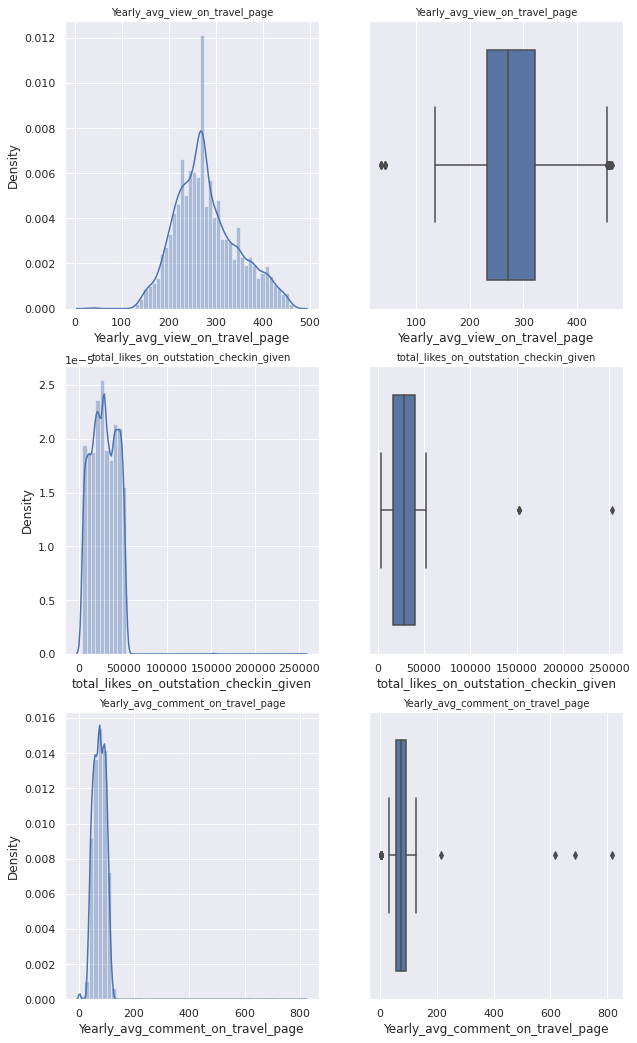

In [81]:
fig, axes = plt.subplots(nrows=3,ncols=2)

fig.set_size_inches(10,18)
a = sns.distplot(df['Yearly_avg_view_on_travel_page'],ax=axes[0][0])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=10)

a = sns.boxplot(df['Yearly_avg_view_on_travel_page'] ,orient ="v",ax=axes[0][1])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=10)


a = sns.distplot(df['total_likes_on_outstation_checkin_given'], ax=axes[1][0])
a.set_title("total_likes_on_outstation_checkin_given",fontsize=10)

a = sns.boxplot(df['total_likes_on_outstation_checkin_given'] , orient = "v" , ax=axes[1][1])
a.set_title("total_likes_on_outstation_checkin_given",fontsize=10)

a = sns.distplot(df['Yearly_avg_comment_on_travel_page'] , ax=axes[2][0])
a.set_title("Yearly_avg_comment_on_travel_page",fontsize=10)

a = sns.boxplot(df['Yearly_avg_comment_on_travel_page'] , orient = "v" , ax=axes[2][1])
a.set_title("Yearly_avg_comment_on_travel_page",fontsize=10)


plt.show()

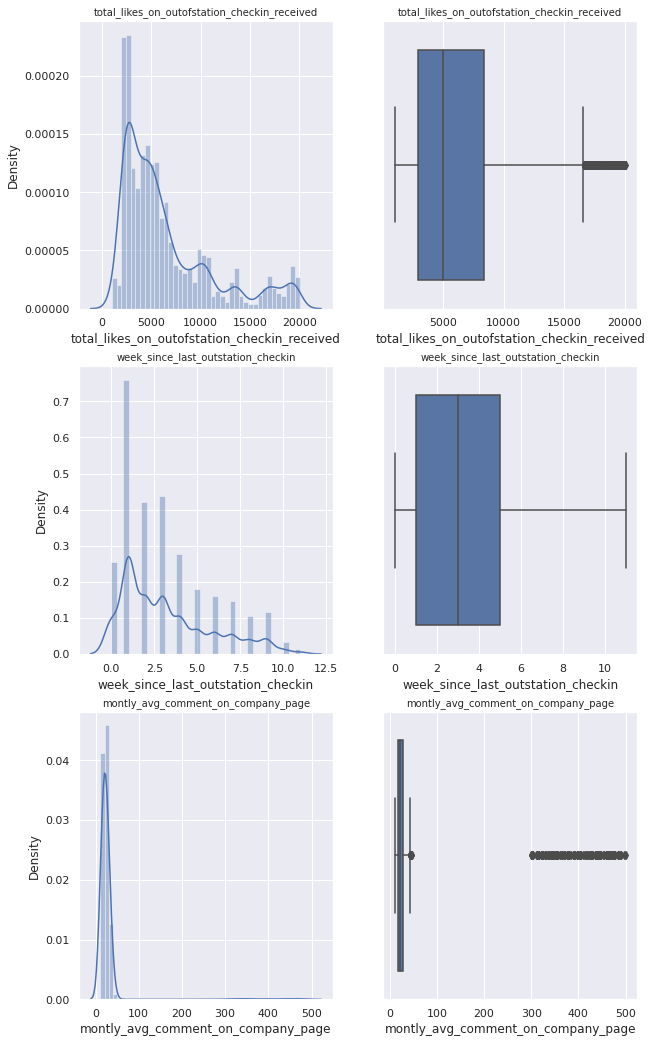

In [82]:
fig, axes = plt.subplots(nrows=3,ncols=2)

fig.set_size_inches(10,18)
a = sns.distplot(df['total_likes_on_outofstation_checkin_received'],ax=axes[0][0])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=10)

a = sns.boxplot(df['total_likes_on_outofstation_checkin_received'] ,orient ="v",ax=axes[0][1])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=10)



a = sns.distplot(df['week_since_last_outstation_checkin'], ax=axes[1][0])
a.set_title("week_since_last_outstation_checkin",fontsize=10)

a = sns.boxplot(df['week_since_last_outstation_checkin'] , orient = "v" , ax=axes[1][1])
a.set_title("week_since_last_outstation_checkin",fontsize=10)

a = sns.distplot(df['montly_avg_comment_on_company_page'] , ax=axes[2][0])
a.set_title("montly_avg_comment_on_company_page",fontsize=10)

a = sns.boxplot(df['montly_avg_comment_on_company_page'] , orient = "v" , ax=axes[2][1])
a.set_title("montly_avg_comment_on_company_page",fontsize=10)


plt.show()

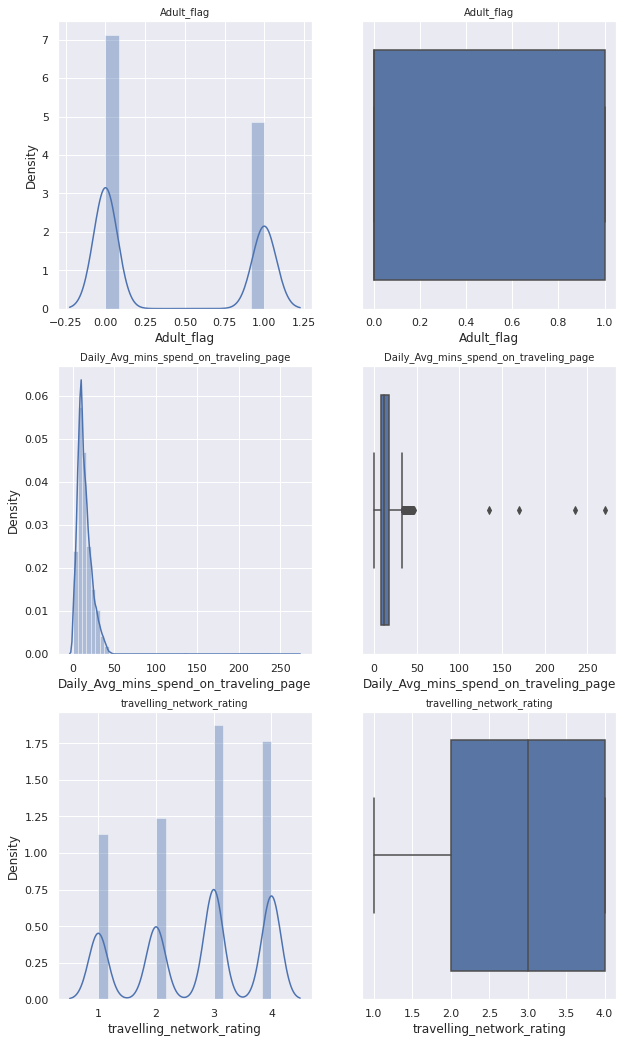

In [83]:
fig, axes = plt.subplots(nrows=3,ncols=2)

fig.set_size_inches(10,18)
a = sns.distplot(df['Adult_flag'],ax=axes[0][0])
a.set_title("Adult_flag",fontsize=10)

a = sns.boxplot(df['Adult_flag'] ,orient ="v",ax=axes[0][1])
a.set_title("Adult_flag",fontsize=10)


a = sns.distplot(df['Daily_Avg_mins_spend_on_traveling_page'], ax=axes[1][0])
a.set_title("Daily_Avg_mins_spend_on_traveling_page",fontsize=10)

a = sns.boxplot(df['Daily_Avg_mins_spend_on_traveling_page'] , orient = "v" , ax=axes[1][1])
a.set_title("Daily_Avg_mins_spend_on_traveling_page",fontsize=10)

a = sns.distplot(df['travelling_network_rating'] , ax=axes[2][0])
a.set_title("travelling_network_rating",fontsize=10)

a = sns.boxplot(df['travelling_network_rating'] , orient = "v" , ax=axes[2][1])
a.set_title("travelling_network_rating",fontsize=10)

plt.show()


##Outlier Check

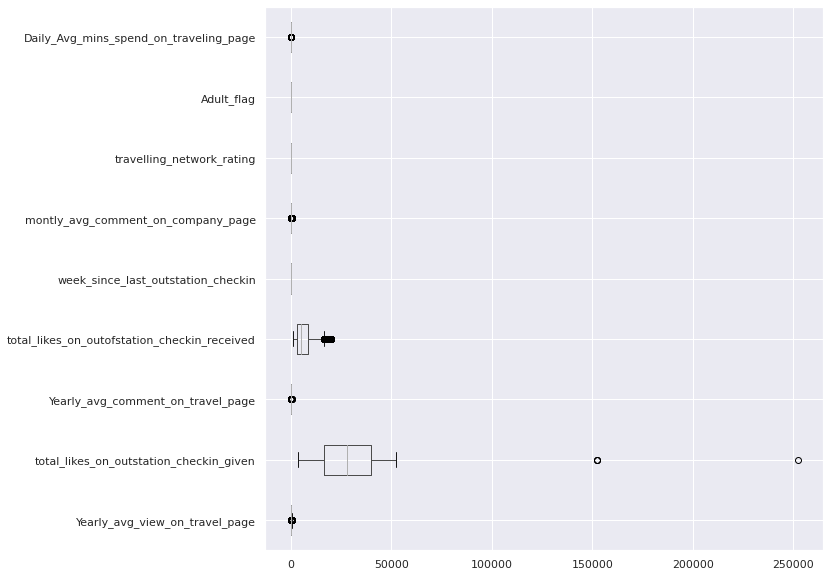

In [84]:
# Outlier Check
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

##Outlier Treatment

In [85]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [86]:
for column in df.columns:
    lr,ur=remove_outlier(df['Yearly_avg_comment_on_travel_page'])
    df['Yearly_avg_comment_on_travel_page']=np.where(df['Yearly_avg_comment_on_travel_page']>ur,ur,df['Yearly_avg_comment_on_travel_page'])
    df['Yearly_avg_comment_on_travel_page']=np.where(df['Yearly_avg_comment_on_travel_page']<lr,lr,df['Yearly_avg_comment_on_travel_page'])


    lr,ur=remove_outlier(df['Yearly_avg_view_on_travel_page'])
    df['Yearly_avg_view_on_travel_page']=np.where(df['Yearly_avg_view_on_travel_page']>ur,ur,df['Yearly_avg_view_on_travel_page'])
    df['Yearly_avg_view_on_travel_page']=np.where(df['Yearly_avg_view_on_travel_page']<lr,lr,df['Yearly_avg_view_on_travel_page'])

    lr,ur=remove_outlier(df['total_likes_on_outstation_checkin_given'])
    df['total_likes_on_outstation_checkin_given']=np.where(df['total_likes_on_outstation_checkin_given']>ur,ur,df['total_likes_on_outstation_checkin_given'])
    df['total_likes_on_outstation_checkin_given']=np.where(df['total_likes_on_outstation_checkin_given']<lr,lr,df['total_likes_on_outstation_checkin_given'])

    lr,ur=remove_outlier(df['total_likes_on_outofstation_checkin_received'])
    df['total_likes_on_outofstation_checkin_received']=np.where(df['total_likes_on_outofstation_checkin_received']>ur,ur,df['total_likes_on_outofstation_checkin_received'])
    df['total_likes_on_outofstation_checkin_received']=np.where(df['total_likes_on_outofstation_checkin_received']<lr,lr,df['total_likes_on_outofstation_checkin_received'])
    
    lr,ur=remove_outlier(df['montly_avg_comment_on_company_page'])
    df['montly_avg_comment_on_company_page']=np.where(df['montly_avg_comment_on_company_page']>ur,ur,df['montly_avg_comment_on_company_page'])
    df['montly_avg_comment_on_company_page']=np.where(df['montly_avg_comment_on_company_page']<lr,lr,df['montly_avg_comment_on_company_page'])


    lr,ur=remove_outlier(df['Daily_Avg_mins_spend_on_traveling_page'])
    df['Daily_Avg_mins_spend_on_traveling_page']=np.where(df['Daily_Avg_mins_spend_on_traveling_page']>ur,ur,df['Daily_Avg_mins_spend_on_traveling_page'])
    df['Daily_Avg_mins_spend_on_traveling_page']=np.where(df['Daily_Avg_mins_spend_on_traveling_page']<lr,lr,df['Daily_Avg_mins_spend_on_traveling_page'])

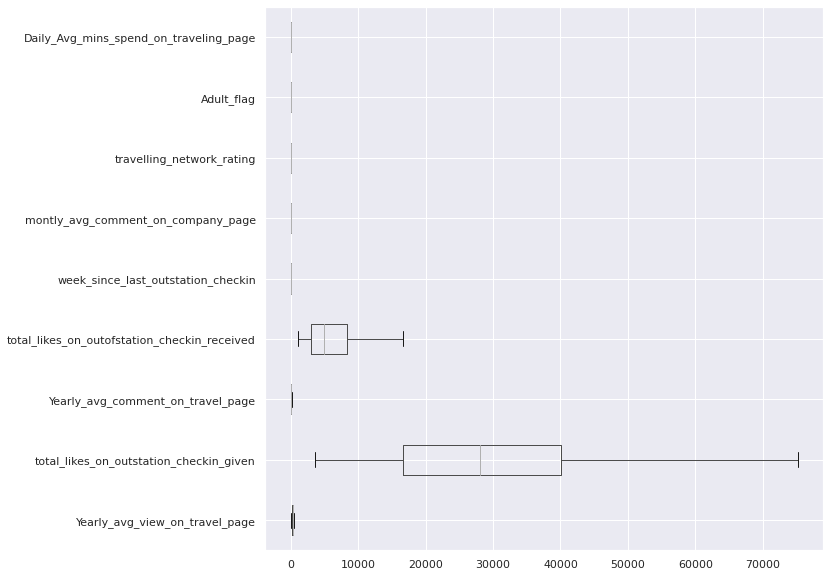

In [87]:
# Outlier Check
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

##Skewness in Data

In [88]:
df.skew()

Taken_product                                   1.842719
Yearly_avg_view_on_travel_page                  0.467096
preferred_device                               -2.778436
total_likes_on_outstation_checkin_given         0.006904
yearly_avg_Outstation_checkins                  0.977245
member_in_family                                0.001205
preferred_location_type                         0.486200
Yearly_avg_comment_on_travel_page              -0.074694
total_likes_on_outofstation_checkin_received    1.163915
week_since_last_outstation_checkin              0.915334
following_company_page                          0.983751
montly_avg_comment_on_company_page              0.503916
working_flag                                    1.920166
travelling_network_rating                      -0.302557
Adult_flag                                      0.385231
Daily_Avg_mins_spend_on_traveling_page          0.719267
dtype: float64

##Analyzing Categorical Variable Frquencies levels using seaborn countplots which gives the counts of observations in each category

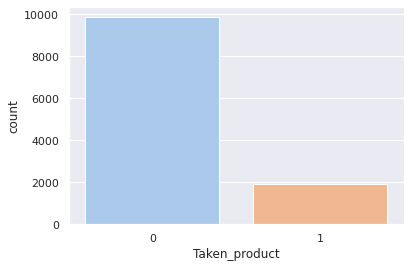

In [89]:
sns.countplot(x='Taken_product',data=df,palette='pastel')

In [90]:
df['Taken_product'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Taken_product, dtype: float64

In [91]:
df.preferred_device.value_counts()

1.0    10652
0.0     1108
Name: preferred_device, dtype: int64

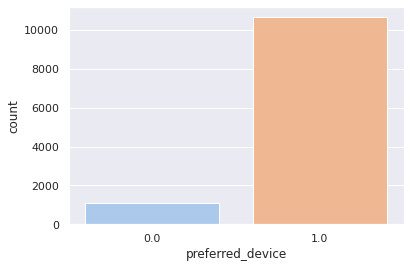

In [92]:
sns.countplot(x='preferred_device',data=df,palette='pastel')

In [93]:
df['preferred_device'].value_counts(normalize=True)

1.0    0.905782
0.0    0.094218
Name: preferred_device, dtype: float64

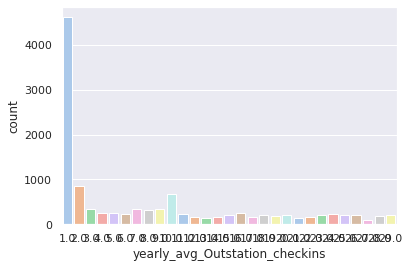

In [94]:
fig.dims=(25,15)
sns.countplot(x='yearly_avg_Outstation_checkins',data=df,palette='pastel')

In [95]:
df['yearly_avg_Outstation_checkins'].value_counts(normalize=True)

1.0     0.392772
2.0     0.071769
10.0    0.057993
9.0     0.028912
3.0     0.028571
7.0     0.028571
8.0     0.027211
5.0     0.022194
4.0     0.021769
16.0    0.021684
6.0     0.020068
11.0    0.019473
24.0    0.018963
29.0    0.018282
23.0    0.018282
18.0    0.017687
15.0    0.017517
20.0    0.016922
26.0    0.016922
25.0    0.016837
28.0    0.015306
19.0    0.014966
14.0    0.014201
17.0    0.013605
12.0    0.013520
22.0    0.012925
13.0    0.012755
21.0    0.012160
27.0    0.008163
Name: yearly_avg_Outstation_checkins, dtype: float64

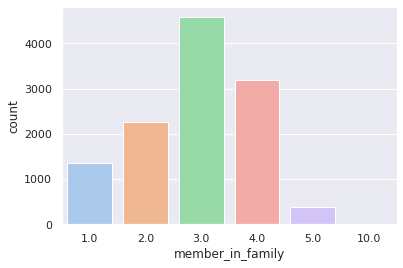

In [96]:
sns.countplot(x='member_in_family',data=df,palette='pastel')

In [97]:
# mobile=df1.loc[df1.preferred_device==1]

In [98]:
df['member_in_family'].value_counts(normalize=True)

3.0     0.389116
4.0     0.270748
2.0     0.191837
1.0     0.114711
5.0     0.032653
10.0    0.000935
Name: member_in_family, dtype: float64

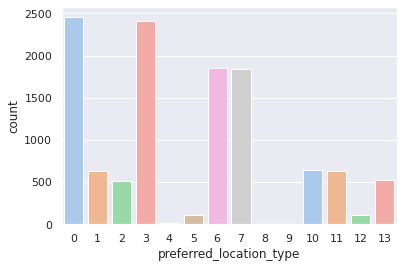

In [99]:
sns.countplot(x='preferred_location_type',data=df,palette='pastel')

In [100]:
df['preferred_location_type'].value_counts(normalize=True)

0     0.208759
3     0.204847
6     0.157823
7     0.156888
10    0.054677
1     0.054082
11    0.053827
13    0.044898
2     0.043878
5     0.009184
12    0.009099
4     0.001020
9     0.000595
8     0.000425
Name: preferred_location_type, dtype: float64

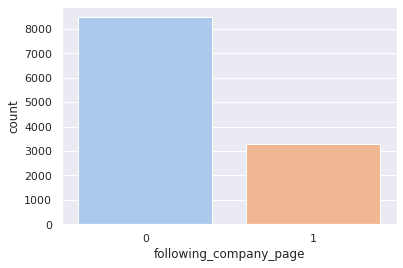

In [101]:

sns.countplot(x='following_company_page',data=df,palette='pastel')

In [102]:
df['following_company_page'].value_counts(normalize=True)

0    0.720663
1    0.279337
Name: following_company_page, dtype: float64

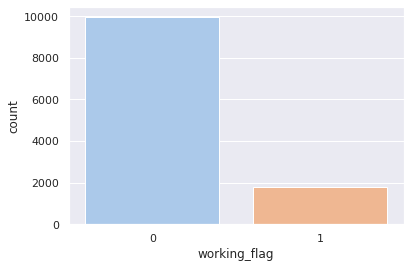

In [103]:
sns.countplot(x='working_flag',data=df,palette='pastel')

In [104]:
df['working_flag'].value_counts(normalize=True)

0    0.846259
1    0.153741
Name: working_flag, dtype: float64

##Bivariate Analysis : We will pick two numerical variable and try to understand the relationship between them .

In [105]:
import seaborn as sns
import scipy.stats as stats


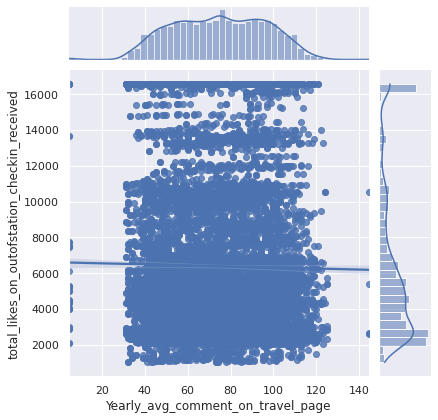

In [106]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Yearly_avg_comment_on_travel_page',y='total_likes_on_outofstation_checkin_received',data = df, kind='reg')
plt.show()

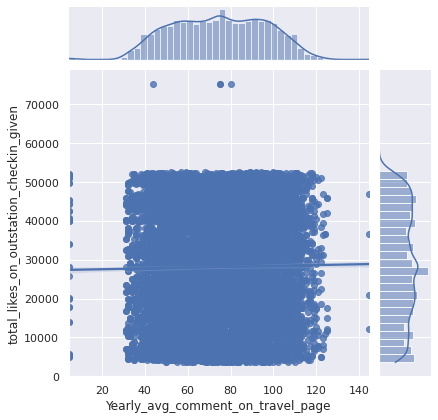

In [107]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Yearly_avg_comment_on_travel_page',y='total_likes_on_outstation_checkin_given',data = df, kind='reg')
plt.show()

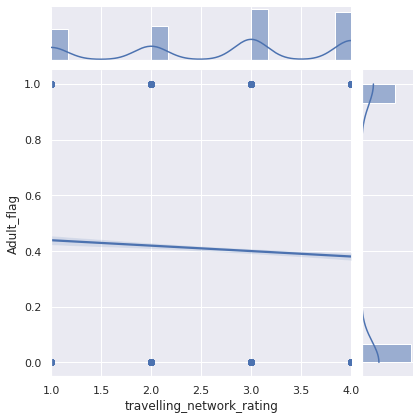

In [108]:
# sns.scatterplot(x='travelling_network_rating',y='Adult_flag',data=social)
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='travelling_network_rating',y='Adult_flag',data = df, kind='reg')
plt.show()

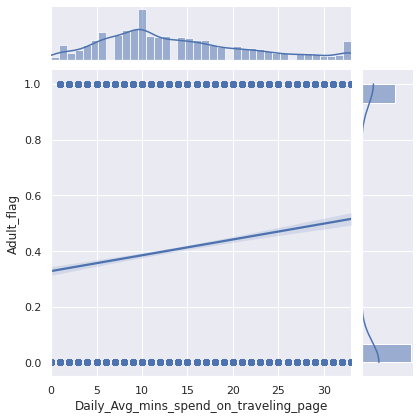

In [109]:

sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Daily_Avg_mins_spend_on_traveling_page',y='Adult_flag',data = df, kind='reg')
plt.show()


##Bivariate for 2 categorical variables

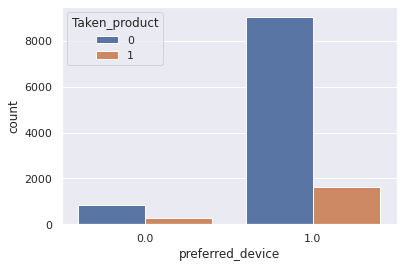

In [110]:
sns.countplot(x='preferred_device',hue='Taken_product',data =df )

In [111]:
pd.crosstab(df['preferred_device'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
preferred_device,,,
0.0,0.070748,0.023469,0.094218
1.0,0.768027,0.137755,0.905782
All,0.838776,0.161224,1.000000


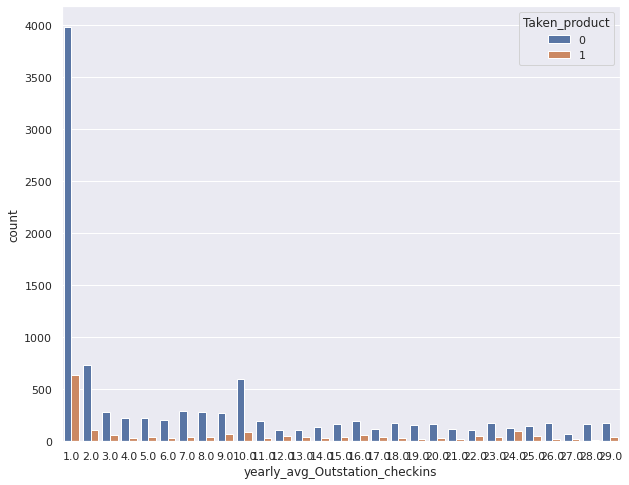

In [112]:

plt.figure(figsize=(10,8))
sns.countplot(x='yearly_avg_Outstation_checkins',hue='Taken_product',data =df )

In [113]:
pd.crosstab(df['yearly_avg_Outstation_checkins'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
yearly_avg_Outstation_checkins,,,
1.0,0.338350,0.054422,0.392772
2.0,0.062245,0.009524,0.071769
3.0,0.023810,0.004762,0.028571
4.0,0.018707,0.003061,0.021769
5.0,0.018793,0.003401,0.022194
6.0,0.017687,0.002381,0.020068
7.0,0.024830,0.003741,0.028571
8.0,0.023810,0.003401,0.027211
9.0,0.022789,0.006122,0.028912


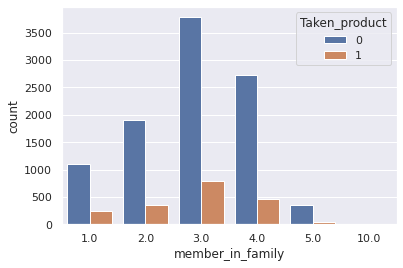

In [114]:
sns.countplot(x='member_in_family',hue='Taken_product',data =df )

In [115]:
pd.crosstab(df['member_in_family'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
member_in_family,,,
1.0,0.093707,0.021003,0.114711
2.0,0.161905,0.029932,0.191837
3.0,0.321769,0.067347,0.389116
4.0,0.231293,0.039456,0.270748
5.0,0.029252,0.003401,0.032653
10.0,0.000850,0.000085,0.000935
All,0.838776,0.161224,1.000000


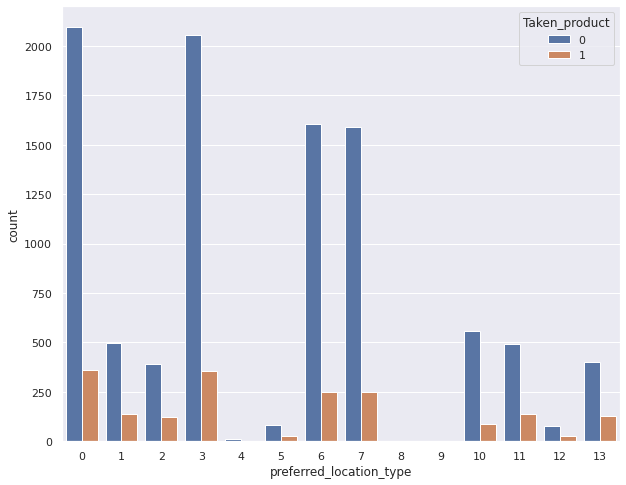

In [116]:
plt.figure(figsize=(10,8))
sns.countplot(x='preferred_location_type',hue='Taken_product',data =df )

In [117]:
pd.crosstab(df['preferred_location_type'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
preferred_location_type,,,
0,0.178231,0.030527,0.208759
1,0.042177,0.011905,0.054082
2,0.033418,0.010459,0.043878
3,0.174745,0.030102,0.204847
4,0.000935,0.000085,0.001020
5,0.006803,0.002381,0.009184
6,0.136395,0.021429,0.157823
7,0.135459,0.021429,0.156888
8,0.000340,0.000085,0.000425


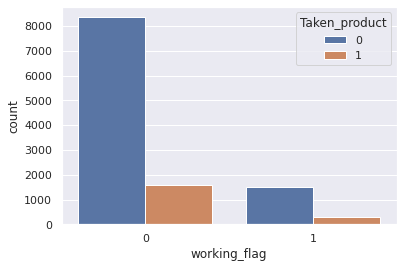

In [118]:
sns.countplot(x='working_flag',hue='Taken_product',data =df)

In [119]:
pd.crosstab(df['working_flag'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
working_flag,,,
0,0.710204,0.136054,0.846259
1,0.128571,0.025170,0.153741
All,0.838776,0.161224,1.000000


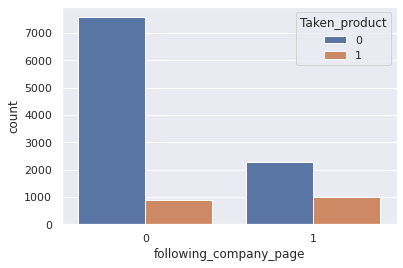

In [120]:
sns.countplot(x='following_company_page',hue='Taken_product',data =df )

In [121]:
pd.crosstab(df['following_company_page'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
following_company_page,,,
0,0.644728,0.075935,0.720663
1,0.194048,0.085289,0.279337
All,0.838776,0.161224,1.000000


##Bivariate analysis for categorical vs numeric variables

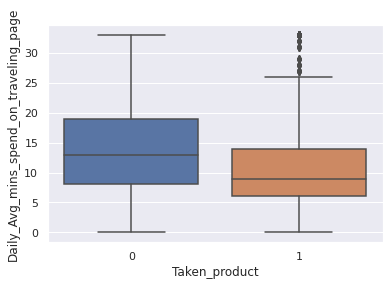

In [122]:
fig_dims=(12,10)
sns.boxplot(x='Taken_product',y='Daily_Avg_mins_spend_on_traveling_page',data=df)

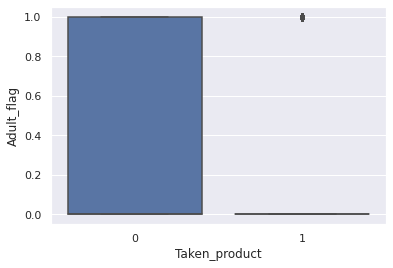

In [123]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Adult_flag',data=df)

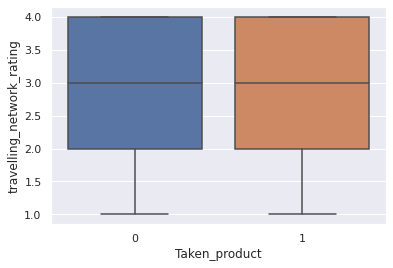

In [124]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='travelling_network_rating',data=df)

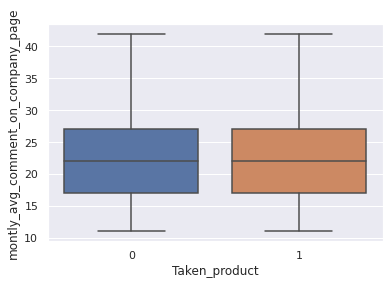

In [125]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='montly_avg_comment_on_company_page',data=df)

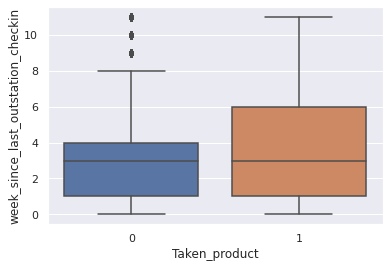

In [126]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='week_since_last_outstation_checkin',data=df)

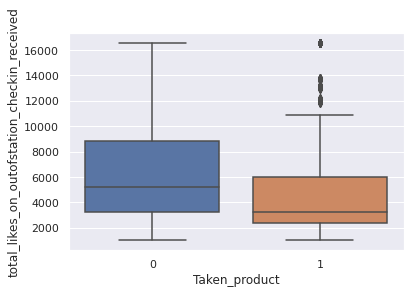

In [127]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='total_likes_on_outofstation_checkin_received',data=df)

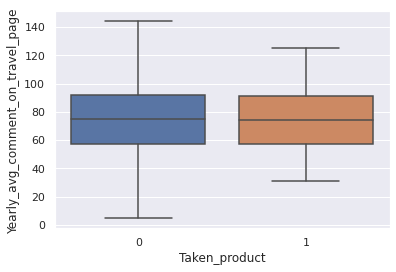

In [128]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Yearly_avg_comment_on_travel_page',data=df)

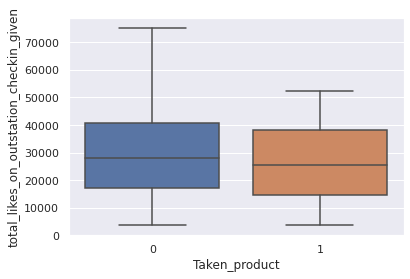

In [129]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='total_likes_on_outstation_checkin_given',data=df)

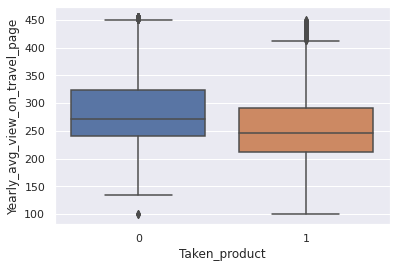

In [130]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=df)

##Pairplot combination of all numeric field -Pairplot

In [131]:
# plt.figure(figsize=(20,18))
# sns.pairplot(df)

##Multivariate Analysis

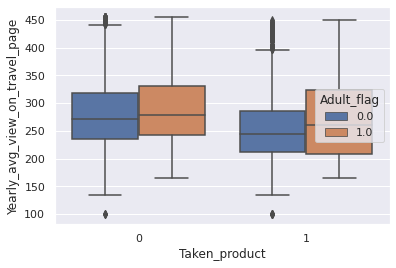

In [132]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=df,hue='Adult_flag')

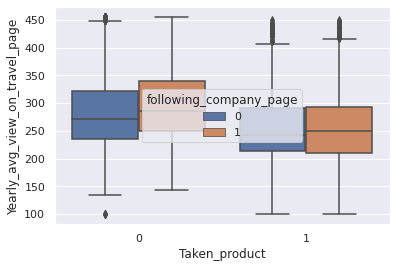

In [133]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=df,hue='following_company_page')

## Correlation Heatmap


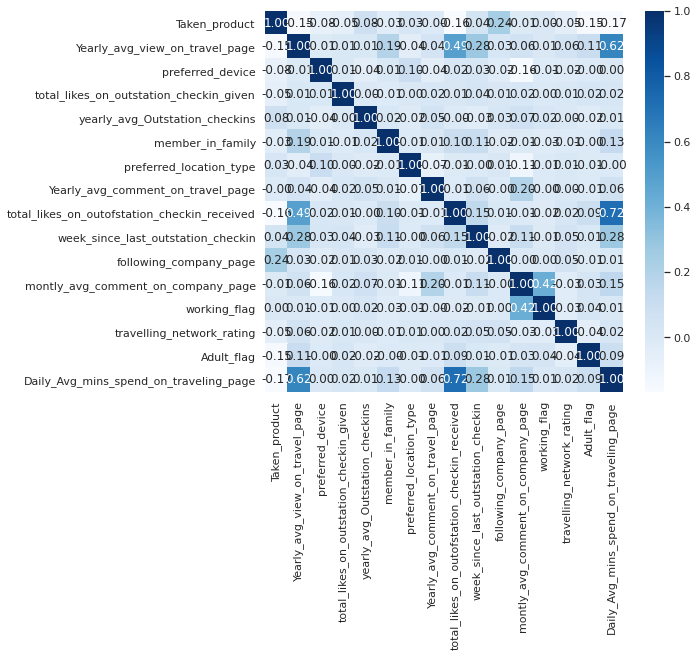

In [134]:

plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

##Data separated for Mobile and laptops 

In [135]:
 mobile=df.loc[df.preferred_device==1]

In [136]:
mobile.shape

(10652, 16)

In [137]:
mobile=mobile.to_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Capstone _Smita/Capstone Codework/Capstone_project 2/social_mobile.csv',index=False )

In [138]:
mobile = pd.read_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Capstone _Smita/Capstone Codework/Capstone_project 2/social_mobile.csv')

In [139]:
mobile.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,1.0,38570.0,1.0,2.0,3,94.0,5993.0,8,1,11.0,0,1,0.0,8.0
1,0,367.0,1.0,9765.0,1.0,1.0,3,61.0,5130.0,1,0,23.0,1,4,1.0,10.0
2,1,277.0,1.0,48055.0,1.0,2.0,10,92.0,2090.0,6,1,15.0,0,2,0.0,7.0
3,0,247.0,1.0,48720.0,1.0,4.0,3,56.0,2909.0,1,1,11.0,0,3,0.0,8.0
4,0,202.0,1.0,20685.0,1.0,1.0,7,40.0,3468.0,9,0,12.0,0,4,1.0,6.0


In [140]:
mobile.drop(['preferred_device'],axis=1,inplace=True)

In [141]:
mobile.shape

(10652, 15)

In [142]:
mobile.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [143]:
X = mobile.drop('Taken_product', axis=1)

y = mobile.pop("Taken_product")

X.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,307.0,38570.0,1.0,2.0,3,94.0,5993.0,8,1,11.0,0,1,0.0,8.0
1,367.0,9765.0,1.0,1.0,3,61.0,5130.0,1,0,23.0,1,4,1.0,10.0
2,277.0,48055.0,1.0,2.0,10,92.0,2090.0,6,1,15.0,0,2,0.0,7.0
3,247.0,48720.0,1.0,4.0,3,56.0,2909.0,1,1,11.0,0,3,0.0,8.0
4,202.0,20685.0,1.0,1.0,7,40.0,3468.0,9,0,12.0,0,4,1.0,6.0


Build LDA Model(Linear Discriminate Analysis)

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


In [145]:
# Linear Discriminant Analysis Modeling

In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [147]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
model=LDA.fit(X_train,y_train)

Training Data Class Prediction with a cut-off value of 0.5-LDA

In [148]:
# Prediction
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

Test Data Class Prediction with a cut-off value of 0.5-LDA

In [149]:
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

Comparing confusion matrix for Train set and Test Set-LDA Model

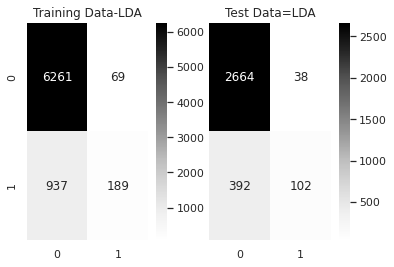

In [150]:
# Training Data and Test Data Confusion Matrix Comparison¶
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data-LDA')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data=LDA');

Comparision of classification report on Train set and Test set-LDA

In [151]:
print('Classification Report of the training data-LDA:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data-LDA:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data-LDA:

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      6330
           1       0.73      0.17      0.27      1126

    accuracy                           0.87      7456
   macro avg       0.80      0.58      0.60      7456
weighted avg       0.85      0.87      0.83      7456
 

Classification Report of the test data-LDA:

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2702
           1       0.73      0.21      0.32       494

    accuracy                           0.87      3196
   macro avg       0.80      0.60      0.62      3196
weighted avg       0.85      0.87      0.83      3196
 



In [152]:
# Probability prediction for the training and test data
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [153]:
pred_prob_train[:,1]

array([0.23576127, 0.02532069, 0.03679778, ..., 0.08240798, 0.04444534,
       0.16127643])

Comparision of ROC-AUC Scores on Train and Test Set-LDA Model

AUC for the Training Data-LDA: 0.761
AUC for the Test Data-LDA: 0.781


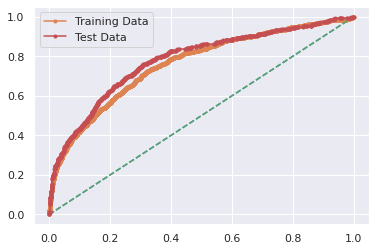

In [154]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data-LDA: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data-LDA: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [155]:
# Cut off values for LDA Model

0.1 

Accuracy Score 0.5858
F1 Score 0.3734 

Recall 0.8171 

Confusion Matrix


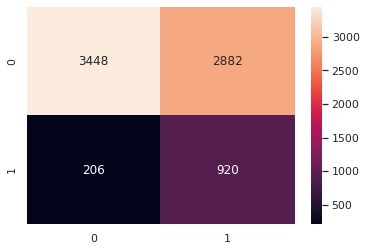

0.2 

Accuracy Score 0.7705
F1 Score 0.4206 

Recall 0.5515 

Confusion Matrix


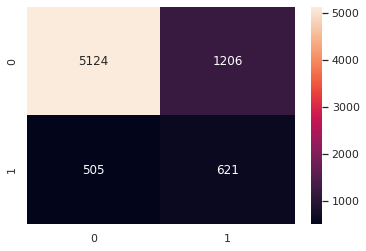

0.3 

Accuracy Score 0.8305
F1 Score 0.4244 

Recall 0.4139 

Confusion Matrix


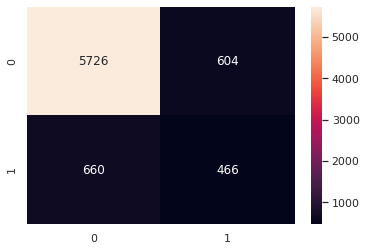

0.4 

Accuracy Score 0.8569
F1 Score 0.3786 

Recall 0.2886 

Confusion Matrix


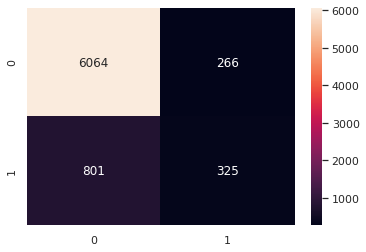

0.5 

Accuracy Score 0.8651
F1 Score 0.2731 

Recall 0.1679 

Confusion Matrix


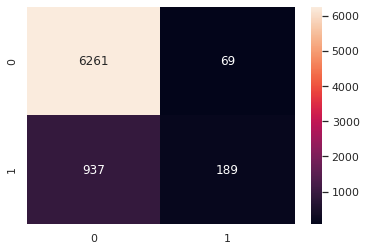

0.6 

Accuracy Score 0.8556
F1 Score 0.115 

Recall 0.0622 

Confusion Matrix


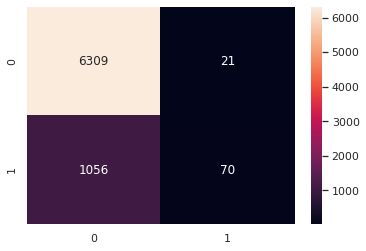

0.7 

Accuracy Score 0.8511
F1 Score 0.0297 

Recall 0.0151 

Confusion Matrix


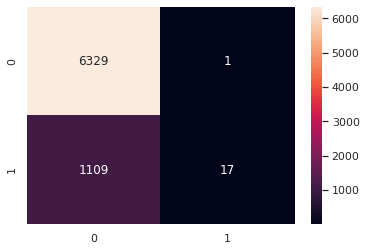

0.8 

Accuracy Score 0.849
F1 Score 0.0 

Recall 0.0 

Confusion Matrix


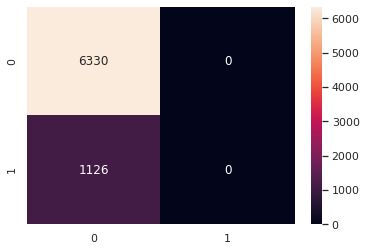

0.9 

Accuracy Score 0.849
F1 Score 0.0 

Recall 0.0 

Confusion Matrix


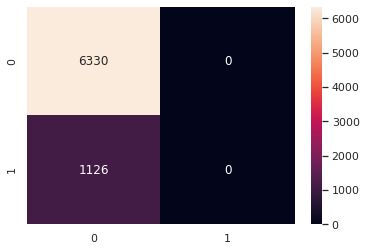

In [156]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    
    plt.figure(figsize=(6,4))
    print('Recall',round(metrics.recall_score(y_train,custom_cutoff_data),4),'\n')
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [157]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.1:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

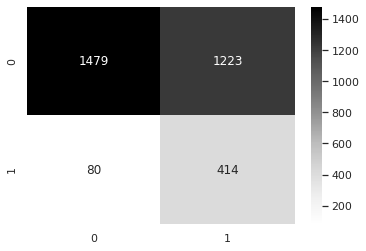

In [158]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

Classification Report of default cut off test data and custom cut off -LDA Model

In [159]:
print('Classification Report of the default cut-off test data-LDA:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data-LDA:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data-LDA:

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2702
           1       0.73      0.21      0.32       494

    accuracy                           0.87      3196
   macro avg       0.80      0.60      0.62      3196
weighted avg       0.85      0.87      0.83      3196
 



Classification Report of the custom cut-off test data-LDA:

               precision    recall  f1-score   support

           0       0.95      0.55      0.69      2702
           1       0.25      0.84      0.39       494

    accuracy                           0.59      3196
   macro avg       0.60      0.69      0.54      3196
weighted avg       0.84      0.59      0.65      3196
 



Linear Discriminate Analysis(After Hyperparameter tunning)

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV

In [161]:
param_grid = { 'solver':['svd','lsqr','eigen'], 'tol':[0.1,.001,.01],'shrinkage':['auto','float','none']}
lda_model= LinearDiscriminantAnalysis()

In [162]:
grid_search = GridSearchCV(estimator = lda_model, param_grid = param_grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [163]:
# grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 5)
# grid_search
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1}

In [164]:
best_grid = grid_search.best_estimator_
best_grid

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.1)

Predicting Train and Test set -LDA Model(After Hyperparameter Tuning)

In [165]:
# Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0])

In [166]:
ytest_predict = best_grid.predict(X_test)
ytest_predict

array([0, 0, 0, ..., 0, 1, 0])

Performance Evaluation on training set-LDA(After Hyperparameter Tunning)

In [167]:
# Performance Evaluation of training data on grid search applied LDA model
confusion_matrix(y_train,ytrain_predict)

array([[6261,   69],
       [ 937,  189]])

In [168]:
LDA_train_acc=best_grid.score(X_train,y_train) 
LDA_train_acc

0.8650751072961373

Classification report on Train set -LDA (After Hyperparameter Tuning )

In [169]:
# Classification report on LDA Grid Search Model on train data 

In [170]:
print('Classification Report train data-LDA(Gridsearch):\n\n',classification_report(y_train,ytrain_predict))

Classification Report train data-LDA(Gridsearch):

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      6330
           1       0.73      0.17      0.27      1126

    accuracy                           0.87      7456
   macro avg       0.80      0.58      0.60      7456
weighted avg       0.85      0.87      0.83      7456



AUC-ROC Scores for Train set-LDA( After Hyperparameter Tuning )

Area under Curve on train -LDA Gridserach 0.7607495110542428


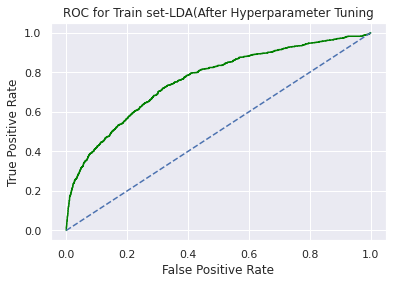

In [171]:
LDA_train_fpr, LDA_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Train set-LDA(After Hyperparameter Tuning')
LDA_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve on train -LDA Gridserach', LDA_train_auc)

Performance Evaluation on Test set-LDA(After Hyperparameter Tuning)

Confusion Matrix on Test set-LDA(After HyperParameter Tuning)

In [172]:
confusion_matrix(y_test,ytest_predict)

array([[2664,   38],
       [ 393,  101]])

In [173]:
LDA_test_acc=best_grid.score(X_test,y_test)
LDA_test_acc

0.8651439299123905

Classification Report on test set -LDA(After Hyperparameter Tuning)

In [174]:
print('Classification Report test data-LDA(Gridsearch):\n\n',classification_report(y_test,ytest_predict))

Classification Report test data-LDA(Gridsearch):

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2702
           1       0.73      0.20      0.32       494

    accuracy                           0.87      3196
   macro avg       0.80      0.60      0.62      3196
weighted avg       0.85      0.87      0.83      3196



ROC-AUC Scores on Test Set -LDA(After Hyperparameter Tuning)

Area under Curve on test-LDA(Gridsearch is 0.7809067807022538


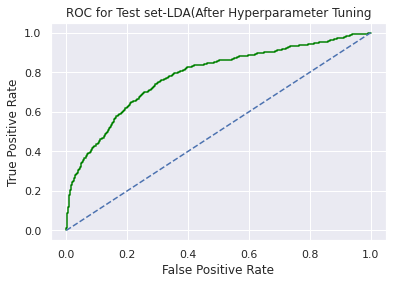

In [175]:
LDA_test_fpr, LDA_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Test set-LDA(After Hyperparameter Tuning')
LDA_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve on test-LDA(Gridsearch is', LDA_test_auc)


Compare Confusion Matrix on Train and Test set-LDA (After Hyperparameter Tuuning)

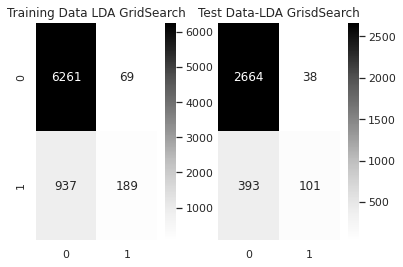

In [176]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data LDA GridSearch')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data-LDA GrisdSearch');

Compare Classification Report for LDA models-train and test data

In [177]:
print('Classification Report train data-LDA:\n\n',classification_report(y_train,ytrain_predict))
print('Classification Report test data-LDA:\n\n',classification_report(y_test,ytest_predict))

Classification Report train data-LDA:

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      6330
           1       0.73      0.17      0.27      1126

    accuracy                           0.87      7456
   macro avg       0.80      0.58      0.60      7456
weighted avg       0.85      0.87      0.83      7456

Classification Report test data-LDA:

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2702
           1       0.73      0.20      0.32       494

    accuracy                           0.87      3196
   macro avg       0.80      0.60      0.62      3196
weighted avg       0.85      0.87      0.83      3196



Compare ROC curves and Calculate Area under the curve for LDA models-train and test data

Area under Curve on Train data for LDA  GridSearch Model is 0.7607495110542428
Area under Curve on test Data for LDA GridSearch Model is 0.7809067807022538


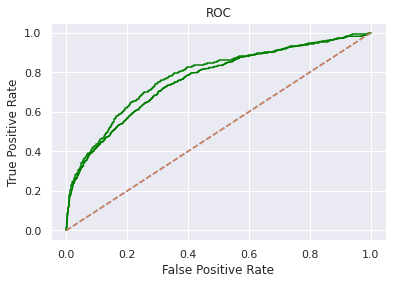

In [178]:
LDA_train_fpr, LDA_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve on Train data for LDA  GridSearch Model is', LDA_train_auc)
LDA_test_fpr, LDA_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve on test Data for LDA GridSearch Model is', LDA_test_auc)

LDA_Smote

In [179]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [180]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [181]:
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [182]:
## Performance Matrix on train data set with SMOTE LDA
y_train_predict = LDA_model.predict(X_train_res)
model_score = LDA_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7116903633491312
[[4462 1868]
 [1782 4548]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      6330
           1       0.71      0.72      0.71      6330

    accuracy                           0.71     12660
   macro avg       0.71      0.71      0.71     12660
weighted avg       0.71      0.71      0.71     12660



In [183]:
## Performance Matrix on test data set Smote LDA
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7165206508135169
[[1922  780]
 [ 126  368]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      2702
           1       0.32      0.74      0.45       494

    accuracy                           0.72      3196
   macro avg       0.63      0.73      0.63      3196
weighted avg       0.84      0.72      0.75      3196



Model Building

Logistic Regression with RFE Feature selection

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [185]:
# Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',8232+3528)

X_train (7456, 14)
X_test (3196, 14)
y_train (7456,)
y_test (3196,)
Total Obs 11760


Logistic Model(With RFE using Sklearn)-Model A

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [187]:
# For modeling we will use Logistic Regression with recursive feature elimination
Logistic = LogisticRegression()

In [188]:
selector = RFE(estimator = Logistic, n_features_to_select=10, step=1)

In [189]:
selector = selector.fit(X_train, y_train)

In [190]:
selector.n_features_

10

In [191]:
selector.ranking_

array([1, 5, 1, 2, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1])

In [192]:
df = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Yearly_avg_view_on_travel_page,1
2,yearly_avg_Outstation_checkins,1
4,preferred_location_type,1
5,Yearly_avg_comment_on_travel_page,1
7,week_since_last_outstation_checkin,1
8,following_company_page,1
10,working_flag,1
11,travelling_network_rating,1
12,Adult_flag,1
13,Daily_Avg_mins_spend_on_traveling_page,1


In [193]:
# Validating the model on train and test set
from sklearn.metrics import confusion_matrix, classification_report

In [194]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [195]:
print(confusion_matrix(y_train, pred_train))

[[6280   50]
 [ 966  160]]


In [196]:
print('Classification Report train data-Logistic Regression(RFE):\n\n',classification_report(y_train, pred_train))

Classification Report train data-Logistic Regression(RFE):

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      6330
           1       0.76      0.14      0.24      1126

    accuracy                           0.86      7456
   macro avg       0.81      0.57      0.58      7456
weighted avg       0.85      0.86      0.82      7456



In [197]:
print(confusion_matrix(y_test, pred_test))

[[2672   30]
 [ 404   90]]


In [198]:
print('Classification Report test data-Logistic Regression(RFE):\n\n',classification_report(y_test, pred_test))

Classification Report test data-Logistic Regression(RFE):

               precision    recall  f1-score   support

           0       0.87      0.99      0.92      2702
           1       0.75      0.18      0.29       494

    accuracy                           0.86      3196
   macro avg       0.81      0.59      0.61      3196
weighted avg       0.85      0.86      0.83      3196



In [199]:
# We see poor recall score for both train and test

# Since only 19% of the total data had defaults, we will now try to balance the data before fiting the model.

Logistic Regression with RFE-Smote

In [200]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [201]:
selector_smote = selector.fit(X_res, y_res)

In [202]:
selector_smote.n_features_

10

In [203]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [204]:
print('Classification Report train data-Logistic Regression(Smote):\n\n',classification_report(y_res, pred_train_smote))

Classification Report train data-Logistic Regression(Smote):

               precision    recall  f1-score   support

           0       0.69      0.72      0.70      6330
           1       0.70      0.67      0.69      6330

    accuracy                           0.69     12660
   macro avg       0.69      0.69      0.69     12660
weighted avg       0.69      0.69      0.69     12660



In [205]:
print('Classification Report test data-Logistic Regression(Smote):\n\n',classification_report(y_test, pred_test_smote))

Classification Report test data-Logistic Regression(Smote):

               precision    recall  f1-score   support

           0       0.93      0.72      0.81      2702
           1       0.31      0.69      0.43       494

    accuracy                           0.72      3196
   macro avg       0.62      0.71      0.62      3196
weighted avg       0.83      0.72      0.75      3196



Logistic Regression(After Hyperparameter Tuning)

In [206]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [207]:
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l2','l1','elasticnet'],
      'solver':['sag','lbfgs'],
     
      'tol':[0.0001,0.00001]},
      

Logistic_grid= LogisticRegression(max_iter=1000,tol=0.001,solver='newton-cg',penalty='12',verbose=True,n_jobs=2)

grid_search = GridSearchCV(estimator =Logistic_grid, param_grid = param_grid)

In [208]:
best_grid=grid_search.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

In [209]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=True,
                   warm_start=False)


In [210]:
from matplotlib import pyplot

Feature: 0, Score: -0.00430
Feature: 1, Score: -0.00001
Feature: 2, Score: 0.02361
Feature: 3, Score: -0.00973
Feature: 4, Score: 0.01827
Feature: 5, Score: -0.00197
Feature: 6, Score: -0.00005
Feature: 7, Score: 0.15205
Feature: 8, Score: 1.67223
Feature: 9, Score: -0.01215
Feature: 10, Score: 0.17590
Feature: 11, Score: -0.14975
Feature: 12, Score: -0.80523
Feature: 13, Score: -0.02177


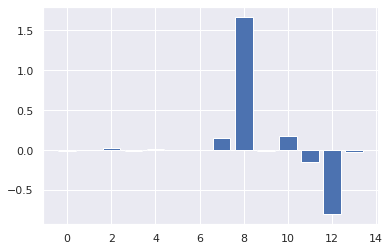

In [211]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Classification Report train data-Logistic Regression(Gridserach):

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      6330
           1       0.73      0.17      0.27      1126

    accuracy                           0.87      7456
   macro avg       0.80      0.58      0.60      7456
weighted avg       0.85      0.87      0.83      7456
 



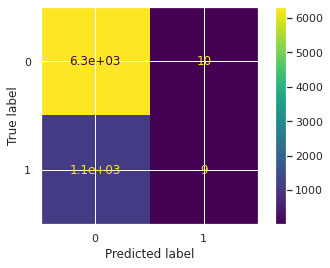

In [212]:
## Confusion matrix on the training data

plot_confusion_matrix(best_grid,X_train,y_train)
print('Classification Report train data-Logistic Regression(Gridserach):\n\n',classification_report(y_train, ytrain_predict),'\n');

Classification Report test data-Logistic Regression(Gridserach):

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2702
           1       0.73      0.20      0.32       494

    accuracy                           0.87      3196
   macro avg       0.80      0.60      0.62      3196
weighted avg       0.85      0.87      0.83      3196
 



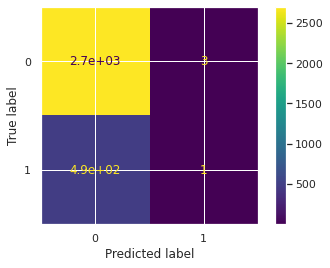

In [213]:
## Confusion matrix on the test data

plot_confusion_matrix(best_grid,X_test,y_test)
print('Classification Report test data-Logistic Regression(Gridserach):\n\n',classification_report(y_test, ytest_predict),'\n');

In [214]:
# Predicting on Training and Test dataset
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

No handles with labels found to put in legend.


AUC: 0.698


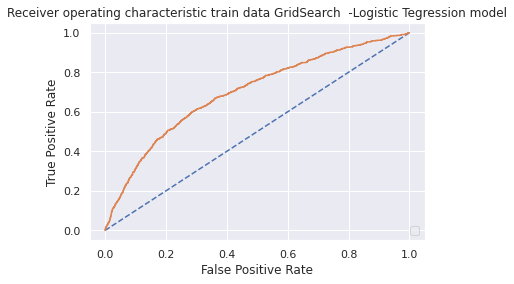

In [215]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data GridSearch  -Logistic Tegression model')
plt.legend(loc="lower right")
plt.savefig('LDA_ROC')
plt.show()

In [216]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.908427,0.091573
1,0.950861,0.049139
2,0.756578,0.243422
3,0.878924,0.121076
4,0.905655,0.094345


In [217]:
# Accuracy - Training Data
best_grid.score(X_train, y_train)

0.8488465665236051

In [218]:
# Accuracy - Test Data
best_grid.score(X_test, y_test)

0.8448060075093867

No handles with labels found to put in legend.


AUC: 0.698


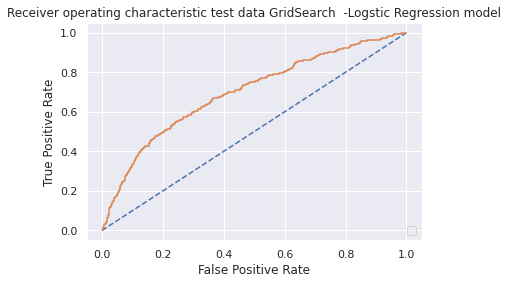

In [219]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data GridSearch  -Logstic Regression model')
plt.legend(loc="lower right")
plt.savefig('LDA_ROC')
plt.show()

In [220]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [221]:
selector = LogisticRegression()
selector.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,selector.coef_[0][idx]))

The coefficient for Yearly_avg_view_on_travel_page is -0.002828306092282299
The coefficient for total_likes_on_outstation_checkin_given is -8.40293879223107e-06
The coefficient for yearly_avg_Outstation_checkins is 0.023631225813128855
The coefficient for member_in_family is 0.0017002539473194246
The coefficient for preferred_location_type is 0.03127211829918705
The coefficient for Yearly_avg_comment_on_travel_page is 0.0005287576976668922
The coefficient for total_likes_on_outofstation_checkin_received is -7.321305143302814e-05
The coefficient for week_since_last_outstation_checkin is 0.09856427102944718
The coefficient for following_company_page is 0.039863289662263116
The coefficient for montly_avg_comment_on_company_page is -0.025658624766885525
The coefficient for working_flag is 0.0008886914817074721
The coefficient for travelling_network_rating is -0.013244530199213485
The coefficient for Adult_flag is -0.02312495133557706
The coefficient for Daily_Avg_mins_spend_on_traveling_pa

In [222]:
intercept = selector.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.5250609104767564e-05


In [223]:
# Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [-4.85771249e-04 -1.14852458e-06  2.66459796e-03 -1.09811826e-03
  2.06133562e-03 -2.22870549e-04 -6.03425930e-06  1.71584410e-02
  1.88668725e-01 -1.37083539e-03  1.98415964e-02 -1.68968799e-02
 -9.08525029e-02 -2.45654585e-03]


In [224]:
# ElasticNet?
from sklearn.linear_model import ElasticNet

In [225]:
elastic=ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.5,random_state=1)

elastic.fit(X_train,y_train)
print ("Elastic model:", (elastic.coef_))
# search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

Elastic model: [-3.08987850e-04 -5.58858227e-07  1.55081839e-03 -0.00000000e+00
  1.03800798e-03 -4.16143065e-05 -4.62907874e-06  9.12228537e-03
  1.28442164e-01 -1.82487441e-04  0.00000000e+00 -7.96518110e-03
 -6.23005324e-02 -2.23264589e-03]


In [226]:
ytrain_predict = elastic.predict(X_train)
ytest_predict = elastic.predict(X_test)

In [227]:
# Let us compare their scores
print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))

0.10637340291122288
0.12424373520193832


In [228]:
# Create a regularized LASSO model and note the coefficients¶
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-4.08564421e-04 -9.97645252e-07  1.36290192e-03 -0.00000000e+00
  0.00000000e+00 -3.77779612e-05 -9.40860245e-06  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


In [229]:
ytrain_predict = lasso.predict(X_train)
ytest_predict = lasso.predict(X_test)

In [230]:
# Let us compare their scores
print(selector.score(X_train, y_train))
print(selector.score(X_test, y_test))

0.8488465665236051
0.8454317897371715


In [231]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Adult_flag': -0.062300532390341036,
 'Daily_Avg_mins_spend_on_traveling_page': -0.0022326458881554425,
 'Yearly_avg_comment_on_travel_page': -4.161430652998416e-05,
 'Yearly_avg_view_on_travel_page': -0.0003089878503974002,
 'following_company_page': 0.12844216415370735,
 'member_in_family': -0.0,
 'montly_avg_comment_on_company_page': -0.00018248744097576283,
 'preferred_location_type': 0.0010380079756407683,
 'total_likes_on_outofstation_checkin_received': -4.629078735479211e-06,
 'total_likes_on_outstation_checkin_given': -5.588582266423964e-07,
 'travelling_network_rating': -0.007965181101446794,
 'week_since_last_outstation_checkin': 0.009122285371410398,
 'working_flag': 0.0,
 'yearly_avg_Outstation_checkins': 0.0015508183921439265}

Logistic Model using stats model-Model B

Approach -2 :We will check multicollinearity and look for insignificant features ,drops it untill we get all significant features .Build Logistic Regression model B .

In [232]:
import statsmodels.formula.api as SM

In [233]:
# X = df.drop(['Taken_product'], axis=1)
# y = df['Taken_product']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [234]:

mobile_train = pd.concat([X_train,y_train], axis=1)
mobile_test = pd.concat([X_test,y_test], axis=1)

mobile_train.to_csv('mobile_train.csv',index=False)
mobile_test.to_csv('mobile_test.csv',index=False)

In [235]:
mobile_train.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Taken_product
3531,249.0,4161.0,16.0,3.0,11,82.0,5366.0,5,0,20.0,0,3,0.0,9.0,1
6990,426.0,50509.0,11.0,5.0,1,96.0,5384.0,4,0,20.0,0,3,1.0,6.0,0
6230,267.0,45611.0,2.0,4.0,0,66.0,2778.0,3,0,20.0,0,3,1.0,14.0,0
6062,239.0,34270.0,1.0,4.0,6,96.0,4348.0,0,0,15.0,0,4,1.0,6.0,0
9198,367.0,41208.0,26.0,4.0,0,111.0,16572.0,5,0,28.0,0,3,1.0,33.0,0


In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [237]:
X = mobile_train.drop('Taken_product', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Yearly_avg_view_on_travel_page,24.547475
9,montly_avg_comment_on_company_page,12.374787
5,Yearly_avg_comment_on_travel_page,11.734014
13,Daily_Avg_mins_spend_on_traveling_page,10.497926
3,member_in_family,8.535486
6,total_likes_on_outofstation_checkin_received,6.879861
11,travelling_network_rating,6.677561
1,total_likes_on_outstation_checkin_given,4.762039
7,week_since_last_outstation_checkin,2.808771
4,preferred_location_type,2.493608


In [238]:
X = X.drop('Yearly_avg_view_on_travel_page', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,montly_avg_comment_on_company_page,12.054768
4,Yearly_avg_comment_on_travel_page,11.070771
12,Daily_Avg_mins_spend_on_traveling_page,9.304938
2,member_in_family,7.521864
5,total_likes_on_outofstation_checkin_received,6.756966
10,travelling_network_rating,6.329532
0,total_likes_on_outstation_checkin_given,4.678220
6,week_since_last_outstation_checkin,2.755597
3,preferred_location_type,2.480783
1,yearly_avg_Outstation_checkins,1.872303


In [239]:
X = X.drop('montly_avg_comment_on_company_page', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Yearly_avg_comment_on_travel_page,8.980441
11,Daily_Avg_mins_spend_on_traveling_page,8.949556
2,member_in_family,7.318033
5,total_likes_on_outofstation_checkin_received,6.687688
9,travelling_network_rating,6.178858
0,total_likes_on_outstation_checkin_given,4.585190
6,week_since_last_outstation_checkin,2.729458
3,preferred_location_type,2.480770
1,yearly_avg_Outstation_checkins,1.853236
10,Adult_flag,1.674658


In [240]:
X = X.drop('Yearly_avg_comment_on_travel_page', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Daily_Avg_mins_spend_on_traveling_page,8.783860
4,total_likes_on_outofstation_checkin_received,6.676824
2,member_in_family,6.457922
8,travelling_network_rating,5.589511
0,total_likes_on_outstation_checkin_given,4.323588
5,week_since_last_outstation_checkin,2.710798
3,preferred_location_type,2.466052
1,yearly_avg_Outstation_checkins,1.813085
9,Adult_flag,1.665595
6,following_company_page,1.372728


In [241]:
X = X.drop('Daily_Avg_mins_spend_on_traveling_page', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,member_in_family,6.348278
8,travelling_network_rating,5.572158
0,total_likes_on_outstation_checkin_given,4.316825
4,total_likes_on_outofstation_checkin_received,3.150184
5,week_since_last_outstation_checkin,2.528595
3,preferred_location_type,2.463827
1,yearly_avg_Outstation_checkins,1.810714
9,Adult_flag,1.659029
6,following_company_page,1.372013
7,working_flag,1.169912


In [242]:
X = X.drop('member_in_family', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,travelling_network_rating,4.948596
0,total_likes_on_outstation_checkin_given,4.022982
3,total_likes_on_outofstation_checkin_received,2.981182
4,week_since_last_outstation_checkin,2.431150
2,preferred_location_type,2.397493
1,yearly_avg_Outstation_checkins,1.773781
8,Adult_flag,1.646969
5,following_company_page,1.370441
6,working_flag,1.167954


In [243]:
import statsmodels.formula.api as SM

In [244]:
#Creating our first model using all variables
model_1 = SM.logit(formula = 'Taken_product ~ travelling_network_rating+ member_in_family + total_likes_on_outstation_checkin_given+ total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin+ preferred_location_type +yearly_avg_Outstation_checkins+ Adult_flag + following_company_page+working_flag', data=mobile_train).fit()

Optimization terminated successfully.
         Current function value: 0.366907
         Iterations 7


In [245]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                 7456
Model:                          Logit   Df Residuals:                     7445
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                  0.1356
Time:                        10:17:32   Log-Likelihood:                -2735.7
converged:                       True   LL-Null:                       -3164.9
Covariance Type:            nonrobust   LLR p-value:                5.613e-178
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.9734      0.171     -5.706      0.000      -1.308      -0.639
travelling_network_rating                       -0.1620      0.032     -5.046      0.000      -0.225      -0.099
member_in_family                                -0.0508      0.033     -1.541      0.123      -0.115       0.014
total_likes_on_outstation_checkin_given      -1.057e-05   2.49e-06     -4.241      0.000   -1.55e-05   -5.68e-06
total_likes_on_outofstation_checkin_received    -0.0001   1.08e-05    -12.910      0.000      -0.000      -0.000
week_since_last_outstation_checkin               0.1097      0.013      8.524      0.000       0.084       0.135
preferred_location_type                          0.0260      0.009      2.856      0.004       0.008       0.044
yearly_avg_Outstation_checkins                   0.0223      0.004      5.751      0.000       0.015       0.030
Adult_flag                                      -0.9055      0.079    -11.527      0.000      -1.059      -0.752
following_company_page                           1.4059      0.071     19.858      0.000       1.267       1.545
working_flag                                     0.0333      0.096      0.346      0.729      -0.155       0.222
================================================================================================================
"""

In [246]:
# Eliminate working flag 

In [247]:
model_2 = SM.logit(formula = 'Taken_product ~ travelling_network_rating+ member_in_family + total_likes_on_outstation_checkin_given+ total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin+ preferred_location_type +yearly_avg_Outstation_checkins+ Adult_flag + following_company_page', data=mobile_train).fit()

Optimization terminated successfully.
         Current function value: 0.366915
         Iterations 7


In [248]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                 7456
Model:                          Logit   Df Residuals:                     7446
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                  0.1356
Time:                        10:17:32   Log-Likelihood:                -2735.7
converged:                       True   LL-Null:                       -3164.9
Covariance Type:            nonrobust   LLR p-value:                5.925e-179
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.9656      0.169     -5.711      0.000      -1.297      -0.634
travelling_network_rating                       -0.1626      0.032     -5.071      0.000      -0.225      -0.100
member_in_family                                -0.0509      0.033     -1.542      0.123      -0.115       0.014
total_likes_on_outstation_checkin_given      -1.057e-05   2.49e-06     -4.242      0.000   -1.55e-05   -5.69e-06
total_likes_on_outofstation_checkin_received    -0.0001   1.08e-05    -12.941      0.000      -0.000      -0.000
week_since_last_outstation_checkin               0.1097      0.013      8.525      0.000       0.084       0.135
preferred_location_type                          0.0259      0.009      2.847      0.004       0.008       0.044
yearly_avg_Outstation_checkins                   0.0223      0.004      5.750      0.000       0.015       0.030
Adult_flag                                      -0.9042      0.078    -11.525      0.000      -1.058      -0.750
following_company_page                           1.4060      0.071     19.860      0.000       1.267       1.545
================================================================================================================
"""

In [249]:
# eliminate member in family as has high p value .

In [250]:
model_3 = SM.logit(formula = 'Taken_product ~ travelling_network_rating+ total_likes_on_outstation_checkin_given+ total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin+ preferred_location_type +yearly_avg_Outstation_checkins+ Adult_flag + following_company_page', data=mobile_train).fit()

Optimization terminated successfully.
         Current function value: 0.367075
         Iterations 7


In [251]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                 7456
Model:                          Logit   Df Residuals:                     7447
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                  0.1352
Time:                        10:17:32   Log-Likelihood:                -2736.9
converged:                       True   LL-Null:                       -3164.9
Covariance Type:            nonrobust   LLR p-value:                1.806e-179
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -1.1068      0.142     -7.770      0.000      -1.386      -0.828
travelling_network_rating                       -0.1605      0.032     -5.007      0.000      -0.223      -0.098
total_likes_on_outstation_checkin_given      -1.044e-05   2.49e-06     -4.193      0.000   -1.53e-05   -5.56e-06
total_likes_on_outofstation_checkin_received    -0.0001   1.08e-05    -13.108      0.000      -0.000      -0.000
week_since_last_outstation_checkin               0.1076      0.013      8.409      0.000       0.083       0.133
preferred_location_type                          0.0259      0.009      2.846      0.004       0.008       0.044
yearly_avg_Outstation_checkins                   0.0223      0.004      5.744      0.000       0.015       0.030
Adult_flag                                      -0.9027      0.078    -11.512      0.000      -1.056      -0.749
following_company_page                           1.4065      0.071     19.875      0.000       1.268       1.545
================================================================================================================
"""

In [252]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.1326954361725854


In [253]:
y_prob_pred_train = model_3.predict(mobile_train)

In [254]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [255]:
from sklearn import metrics

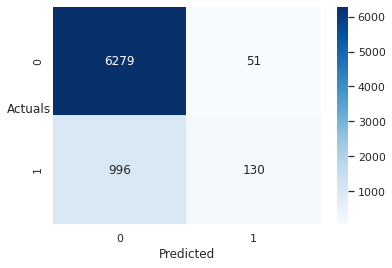

In [256]:
sns.heatmap((metrics.confusion_matrix(mobile_train['Taken_product'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [257]:
# Prediction on the Data
# Now, let us see the predicted probability values.

In [258]:
y_prob_pred_3 = model_3.predict()

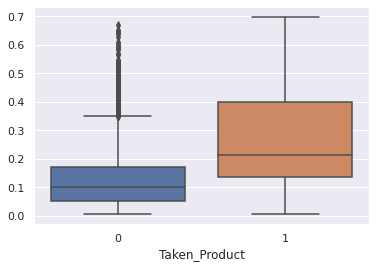

In [259]:
sns.boxplot(x=mobile_train['Taken_product'],y=y_prob_pred_3)
plt.xlabel('Taken_Product');

In [260]:
# Choosing the optimal threshold

In [261]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(mobile_train['Taken_product'],y_prob_pred_train)

In [262]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.13561974539668153

In [263]:
# Validating on the train set with revised threshold

In [264]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.135:
        a=1
    else:
        a=0
    y_class_pred.append(a)

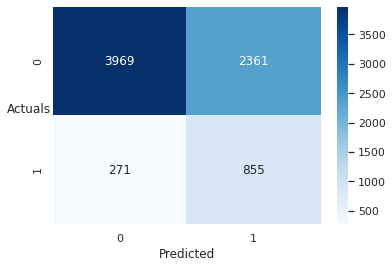

In [265]:
sns.heatmap((metrics.confusion_matrix(mobile_train['Taken_product'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [266]:
print(metrics.classification_report(mobile_train['Taken_product'],y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.94      0.63      0.75      6330
           1       0.27      0.76      0.39      1126

    accuracy                           0.65      7456
   macro avg       0.60      0.69      0.57      7456
weighted avg       0.83      0.65      0.70      7456



In [267]:
# Validating on the test set

In [268]:
y_prob_pred_test = model_3.predict(mobile_test)

In [269]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.135:
        a=1
    else:
        a=0
    y_class_pred.append(a)

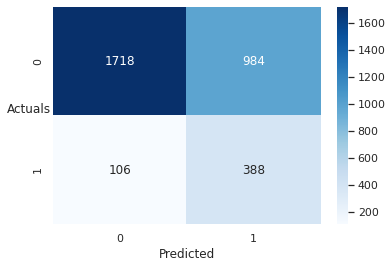

In [270]:
sns.heatmap((metrics.confusion_matrix(mobile_test['Taken_product'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [271]:
print(metrics.classification_report(mobile_test['Taken_product'],y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      2702
           1       0.28      0.79      0.42       494

    accuracy                           0.66      3196
   macro avg       0.61      0.71      0.59      3196
weighted avg       0.84      0.66      0.71      3196



In [272]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
/*pyplot.show()-

SyntaxError: ignored

In [ ]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE is only applied on the train data set

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
## Let's check the shape after SMOTE
X_train_res.shape

In [ ]:
# Logistic Stats Models  With SMOTE¶
from sklearn.linear_model import LogisticRegression

In [ ]:
Logit_SM_model=LogisticRegression()

In [ ]:
Logit_SM_model.fit(X_train_res,y_train_res)

In [ ]:
## Performance Matrix on train data set
y_train_predict = Logit_SM_model.predict(X_train_res)
model_score = Logit_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = Logit_SM_model.predict(X_test)
model_score = Logit_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Logistic Model using stats model-Model C

Approach -2 :We will not check multicollinearity and look for insignificant features ,drops it untill we get all significant features .Build Logistic Regression model C.

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
mobile_train.columns

In [ ]:
# /Model 1¶
# Before starting model building, lets look at the problem of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

In [ ]:
# Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model

In [ ]:
#Creating our first model using all variables
Model_1 = SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page + total_likes_on_outstation_checkin_given + yearly_avg_Outstation_checkins + member_in_family + preferred_location_type + Yearly_avg_comment_on_travel_page + total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin + following_company_page+montly_avg_comment_on_company_page+ working_flag+ travelling_network_rating+ Adult_flag+ Daily_Avg_mins_spend_on_traveling_page', data=mobile_train).fit()

In [ ]:
# Checking the coefficients
Model_1.summary()

In [ ]:
# Variable member_in_familyhas the highest p-value and is insignificant, therefore, we need to eliminate it.

In [ ]:
Model_2 = SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page + total_likes_on_outstation_checkin_given + yearly_avg_Outstation_checkins + preferred_location_type + Yearly_avg_comment_on_travel_page + total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin + following_company_page+montly_avg_comment_on_company_page+ working_flag+ travelling_network_rating+ Adult_flag+ Daily_Avg_mins_spend_on_traveling_page', data=mobile_train).fit()

In [ ]:
Model_2.summary()

In [ ]:
# Eliminating Yearly_avg_comment_on_travel_page

In [ ]:

Model_3= SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page + total_likes_on_outstation_checkin_given + yearly_avg_Outstation_checkins + preferred_location_type + total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin + following_company_page+montly_avg_comment_on_company_page+ working_flag+ travelling_network_rating+ Adult_flag+ Daily_Avg_mins_spend_on_traveling_page', data=mobile_train).fit()

In [ ]:
Model_3.summary()

In [ ]:
# Eliminating working_flag

In [ ]:
Model_4= SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page + total_likes_on_outstation_checkin_given + yearly_avg_Outstation_checkins + preferred_location_type + total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin + following_company_page+montly_avg_comment_on_company_page+ travelling_network_rating+ Adult_flag+ Daily_Avg_mins_spend_on_traveling_page', data=mobile_train).fit()

In [ ]:
Model_4.summary()

In [ ]:
# Eliminating montly_avg_comment_on_company_page

In [ ]:
Model_5= SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page + total_likes_on_outstation_checkin_given + yearly_avg_Outstation_checkins + preferred_location_type + total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin + following_company_page+ travelling_network_rating+ Adult_flag+ Daily_Avg_mins_spend_on_traveling_page', data=mobile_train).fit()

In [ ]:
Model_5.summary()

In [ ]:
# Now all the variables are significant, therefore, we don't need to eliminate any variable.
# We can see that all variables are significant & may be useful to discriminate cases of deault

In [ ]:
print('The adjusted pseudo R-square value is',1 - ((Model_5.llf - Model_5.df_model)/Model_5.llnull))

In [ ]:
# Adjusted pseudo R-square seems to be very close to Pseudo R-square value which means there are no insignificant variables present in the model. 

In [ ]:
# We see that adjusted R sq is now close to Rsq, thus suggesting lesser insignificant variables in the model

# We also notice that current model has no insignificant variables and can be used for prediction purposes.

# Lets test the prediction of this model on train and test dataset

In [ ]:
# Prediction on the Data
# Let us first check the distribution plot of the logit function values

In [ ]:
sns.distplot(Model_5.fittedvalues);

In [ ]:
# Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',8232+3528)

In [ ]:
# Now, let us see the predicted probability values:

In [ ]:
# Prediction on Train set¶
y_predict_train = Model_5.predict(X_train)
y_predict_train

In [ ]:
sns.boxplot(x=mobile_train['Taken_product'],y=y_predict_train)
plt.xlabel('Taken_product');

In [ ]:
# From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us take a cut-off of 0.42 and check.
# 
# Let us now see the predicted classes

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.042:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
from sklearn import metrics

In [ ]:
# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

In [ ]:
# As observed above, accuracy of the model i.e. %overall correct predictions is 31%
# Sensitivity of the model is 94% i.e. 94 % of those defaulted were correctly identified as defaulters by the model

In [ ]:
# Prediction on Test set
y_predict_test = Model_5.predict(X_test)
y_predict_test

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.042:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
# Checking the accuracy of the model using confusion matrix for test set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
# Let us now go ahead and print the classification report to check the various other parameters

print(metrics.classification_report(y_test,y_class_pred,digits=2))

In [ ]:
# As observed above, accuracy of the model i.e. %overall correct predictions is 31%
# Sensitivity of the model is 94% i.e. 94% of those defaulted were correctly identified as defaulters by the model

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)


In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

In [ ]:
# Prediction on Test set
y_predict_test = Model_5.predict(X_test)
y_predict_test

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
# Checking the accuracy of the model using confusion matrix for test set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
print(metrics.classification_report(y_test,y_class_pred,digits=2))

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:

# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

In [ ]:
# Prediction on Test set
y_predict_test = Model_5.predict(X_test)
y_predict_test

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
# Checking the accuracy of the model using confusion matrix for test set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
# Let us now go ahead and print the classification report to check the various other parameters

print(metrics.classification_report(y_test,y_class_pred,digits=2))

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.18:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

In [ ]:
# Prediction on Test set
y_predict_test = Model_5.predict(X_test)
y_predict_test

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.18:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
# Checking the accuracy of the model using confusion matrix for test set¶
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
# Let us now go ahead and print the classification report to check the various other parameters

print(metrics.classification_report(y_test,y_class_pred,digits=2))

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

In [ ]:
# Prediction on Test set¶
y_predict_test = Model_5.predict(X_test)
y_predict_test

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
# Checking the accurcy of the model using confusion matrix for test set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
# Let us now go ahead and print the classification report to check the various other parameters

print(metrics.classification_report(y_test,y_class_pred,digits=2))

In [ ]:

y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.20:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))